In [1]:
 from torchvision import datasets
 data_path = '/data-unversioned/p1ch7/cifar-10-batches-py'
 cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
 cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100%|██████████| 170M/170M [00:13<00:00, 12.3MB/s]


In [2]:
 type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [3]:
len(cifar10)

50000

In [4]:
img, label = cifar10[99]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

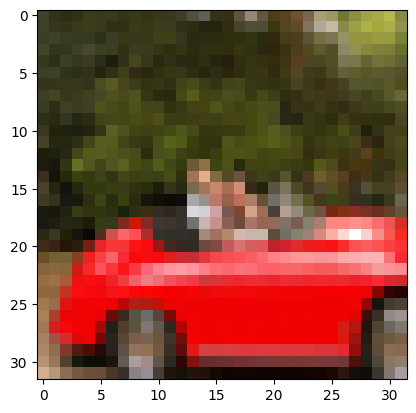

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [6]:
 from torchvision import transforms
 dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [7]:
from torchvision import transforms
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [8]:
 tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
 transform=transforms.ToTensor())

In [9]:
 img_t, _ = tensor_cifar10[99]
 type(img_t)

torch.Tensor

In [10]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [11]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

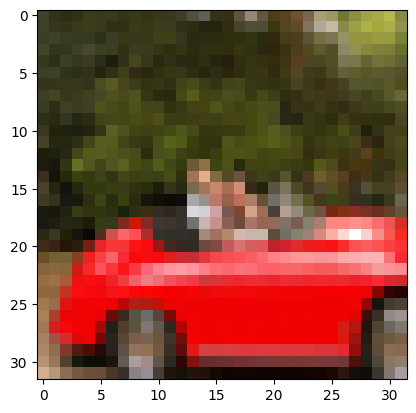

In [12]:
 plt.imshow(img_t.permute(1, 2, 0))
 plt.show()

In [13]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [14]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [15]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [16]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [17]:
 transformed_cifar10 = datasets.CIFAR10(
 data_path, train=True, download=False,
 transform=transforms.Compose([
 transforms.ToTensor(),
 transforms.Normalize((0.4915, 0.4823, 0.4468),
 (0.2470, 0.2435, 0.2616))
 ]))

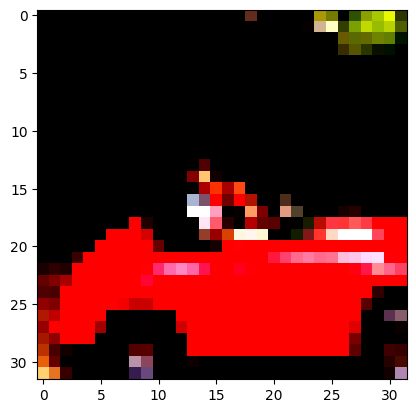

In [18]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [38]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(transforms.ToTensor()(img), label_map[label])
for img, label in cifar10
if label in [0, 2]]
cifar2_val = [(transforms.ToTensor()(img), label_map[label])
for img, label in cifar10_val
if label in [0, 2]]

In [20]:
import torch.nn as nn
n_out = 2
# Input features
# Output classes
model = nn.Sequential(
nn.Linear(3072,512,),
nn.Tanh(),
nn.Linear(512,n_out,))

In [21]:
def softmax(x):
 return torch.exp(x) / torch.exp(x).sum()

In [22]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [23]:
softmax(x).sum()

tensor(1.)

In [24]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
[1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [25]:
 model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.Softmax(dim=1))

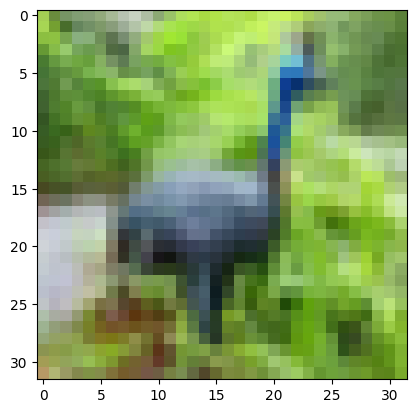

In [26]:
img_t, _ = cifar2[0]
img_t = to_tensor(img_t)
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [27]:
img_t = to_tensor(img)
img_batch = img_t.view(-1).unsqueeze(0)

In [28]:
 out = model(img_batch)
 out

tensor([[0.5393, 0.4607]], grad_fn=<SoftmaxBackward0>)

In [29]:
 _, index = torch.max(out, dim=1)
 index

tensor([0])

In [30]:
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.LogSoftmax(dim=1))
loss = nn.NLLLoss()
img, label = cifar2[0]
img_t = to_tensor(img)
out = model(img_t.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.6540, grad_fn=<NllLossBackward0>)

In [31]:
import torch
import torch.nn as nn
from torch import optim
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 5
for epoch in range(n_epochs):
 for img, label in cifar2:
  img_t = to_tensor(img)
  out = model(img_t.view(-1).unsqueeze(0))
  loss = loss_fn(out, torch.tensor([label]))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
 print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

/tmp/ipython-input-3175390108.py:21: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


Epoch: 0, Loss: 1.212421
Epoch: 1, Loss: 1.453369
Epoch: 2, Loss: 1.916056
Epoch: 3, Loss: 2.466048
Epoch: 4, Loss: 2.985746


In [32]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
 shuffle=True)

In [33]:
import torch
import torch.nn as nn
from torch import optim
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
 shuffle=True)
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 5
for epoch in range(n_epochs):
 for img, label in cifar2:
  img_t = to_tensor(img)
  out = model(img_t.view(-1).unsqueeze(0))
  loss = loss_fn(out, torch.tensor([label]))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
 print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.169678
Epoch: 1, Loss: 1.338720
Epoch: 2, Loss: 1.982815
Epoch: 3, Loss: 2.057581
Epoch: 4, Loss: 2.874628


In [40]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
 shuffle=False)
correct = 0
total = 0
with torch.no_grad():
 for imgs, labels in val_loader:
  batch_size = imgs.shape[0]
  outputs = model(imgs.view(batch_size,-1))
  _, predicted = torch.max(outputs, dim=1)
  total += labels.shape[0]
  correct += int((predicted == labels).sum())
print("Accuracy: %f" % (correct / total))

Accuracy: 0.542000


In [41]:
model = nn.Sequential(
 nn.Linear(3072, 1024),
 nn.Tanh(),
 nn.Linear(1024, 512),
 nn.Tanh(),
 nn.Linear(512, 128),
 nn.Tanh(),
 nn.Linear(128, 2),
 nn.LogSoftmax(dim=1))

In [42]:
model = nn.Sequential(
 nn.Linear(3072, 1024),
 nn.Tanh(),
 nn.Linear(1024, 512),
 nn.Tanh(),
 nn.Linear(512, 128),
 nn.Tanh(),
 nn.Linear(128, 2))
loss_fn = nn.CrossEntropyLoss()

In [44]:
numel_list = [p.numel()
 for p in model.parameters()
 if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [46]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [47]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))